In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv("Admission_Predict.csv")

In [59]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [60]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [62]:
from sklearn.preprocessing import Binarizer

In [63]:
limit = Binarizer(threshold=0.75)

In [64]:
data['Chance of Admit '] = limit.fit_transform(data[['Chance of Admit ']])

In [65]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1.0
396,397,325,107,3,3.0,3.5,9.11,1,1.0
397,398,330,116,4,5.0,4.5,9.45,1,1.0
398,399,312,103,3,3.5,4.0,8.78,0,0.0


In [66]:
inputdata = data.drop(['Chance of Admit '],axis=1)

In [67]:
outputdata = data['Chance of Admit ']

In [68]:
outputdata

0      1.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
395    1.0
396    1.0
397    1.0
398    0.0
399    1.0
Name: Chance of Admit , Length: 400, dtype: float64

In [69]:
outputdata.astype(int)

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train , y_train , x_test ,y_test = train_test_split(inputdata,outputdata,random_state=0,test_size=0.25)

In [72]:
x_train.shape

(300, 8)

In [73]:
x_test.shape

(300,)

In [74]:
y_train.shape

(100, 8)

In [75]:
y_test.shape

(100,)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
classsifier = DecisionTreeClassifier(random_state=0)

In [78]:
classifier.fit(x_train,x_test)

DecisionTreeClassifier(random_state=0)

In [80]:
classifier.predict(y_train)

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.])

In [81]:
predicted = classifier.predict(y_train)

In [82]:
y_test

132    0.0
309    0.0
341    1.0
196    0.0
246    0.0
      ... 
146    0.0
135    1.0
390    0.0
264    0.0
364    1.0
Name: Chance of Admit , Length: 100, dtype: float64

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

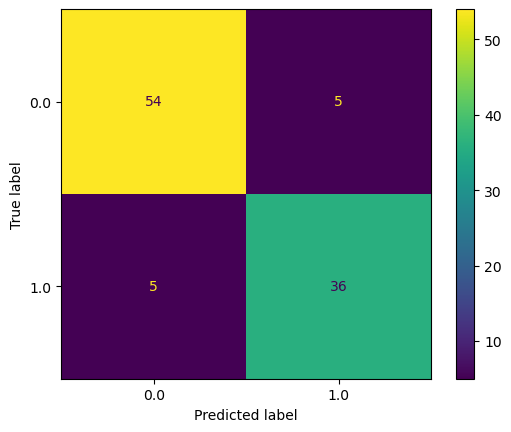

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [85]:
from sklearn.metrics import classification_report , accuracy_score

In [86]:
accuracy_score(y_test,predicted)

0.9

In [87]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        59
         1.0       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [89]:
from sklearn.tree import plot_tree

[Text(0.565625, 0.95, 'CGPA <= 8.655\ngini = 0.492\nsamples = 300\nvalue = [169, 131]\nclass = NA'),
 Text(0.365625, 0.85, 'LOR  <= 4.25\ngini = 0.14\nsamples = 159\nvalue = [147, 12]\nclass = NA'),
 Text(0.465625, 0.8999999999999999, 'True  '),
 Text(0.25625, 0.75, 'GRE Score <= 319.5\ngini = 0.089\nsamples = 150\nvalue = [143, 7]\nclass = NA'),
 Text(0.1625, 0.65, 'SOP <= 4.75\ngini = 0.056\nsamples = 138\nvalue = [134, 4]\nclass = NA'),
 Text(0.1, 0.55, 'CGPA <= 8.51\ngini = 0.043\nsamples = 135\nvalue = [132, 3]\nclass = NA'),
 Text(0.05, 0.45, 'SOP <= 3.25\ngini = 0.017\nsamples = 119\nvalue = [118, 1]\nclass = NA'),
 Text(0.025, 0.35, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]\nclass = NA'),
 Text(0.075, 0.35, 'GRE Score <= 310.5\ngini = 0.064\nsamples = 30\nvalue = [29, 1]\nclass = NA'),
 Text(0.05, 0.25, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = NA'),
 Text(0.1, 0.25, 'GRE Score <= 311.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = NA'),
 Text(0.075, 0.15, 'C

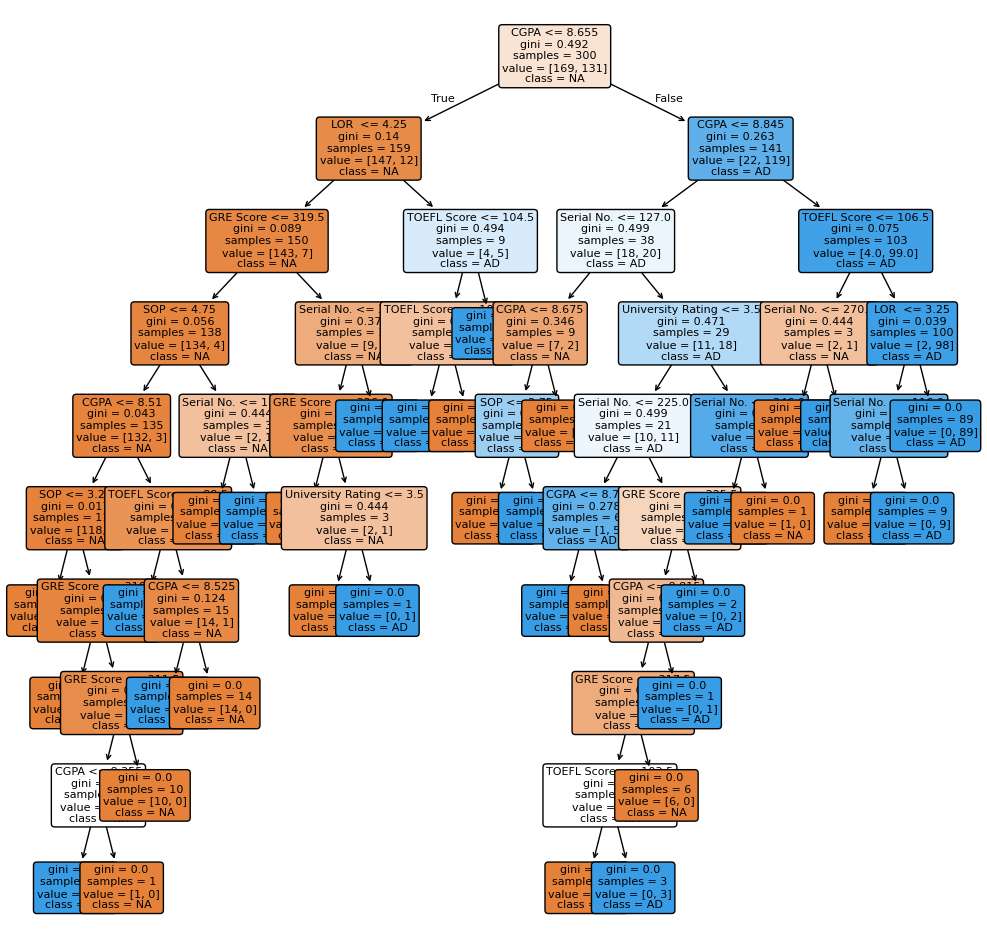

In [94]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=["NA","AD"])